In [36]:
import pandas as pd
import numpy as np



from matplotlib import pyplot as plot
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams


from sklearn.tree import DecisionTreeRegressor

In [37]:
df = pd.read_excel('website.xlsx')
df.head()

,criacao,id,predio,canal,noite,total
0,2020-01-02,LV29F,2,Website,177.67,4719.46
1,2020-01-02,MK01F,2,Website,164.10,6007.65
2,2020-01-03,NX08F,1,Website,210.00,420.00
3,2020-01-03,LW05F,1,Website,210.00,420.00
4,2020-01-03,LV33F,2,Website,165.00,595.00


In [38]:
#Períodos limites do dataset
print("A data inicial é: ", df['criacao'].min())
print("A data final é: ", df['criacao'].max())

A data inicial é:  2019-07-01 00:00:00
A data final é:  2020-05-17 00:00:00


In [39]:
df_2 = df.groupby(by="criacao").mean()
loja_1 = pd.DataFrame()
loja_1['Data'] = df['criacao'].unique()
loja_1['total'] = df_2['total'].values.tolist()
loja_1.head()

,Data,total
0,2020-01-02,1906.000000
1,2020-01-03,483.350000
2,2020-01-04,739.037500
3,2020-01-05,363.675000
4,2020-01-06,409.909091


In [40]:
df_2.head()

,predio,noite,total
criacao,,,
2019-07-01,1.333333,233.666667,1906.000000
2019-07-02,1.500000,231.258333,483.350000
2019-07-03,1.250000,244.568750,739.037500
2019-07-04,1.166667,244.508333,363.675000
2019-07-05,1.545455,219.272727,409.909091


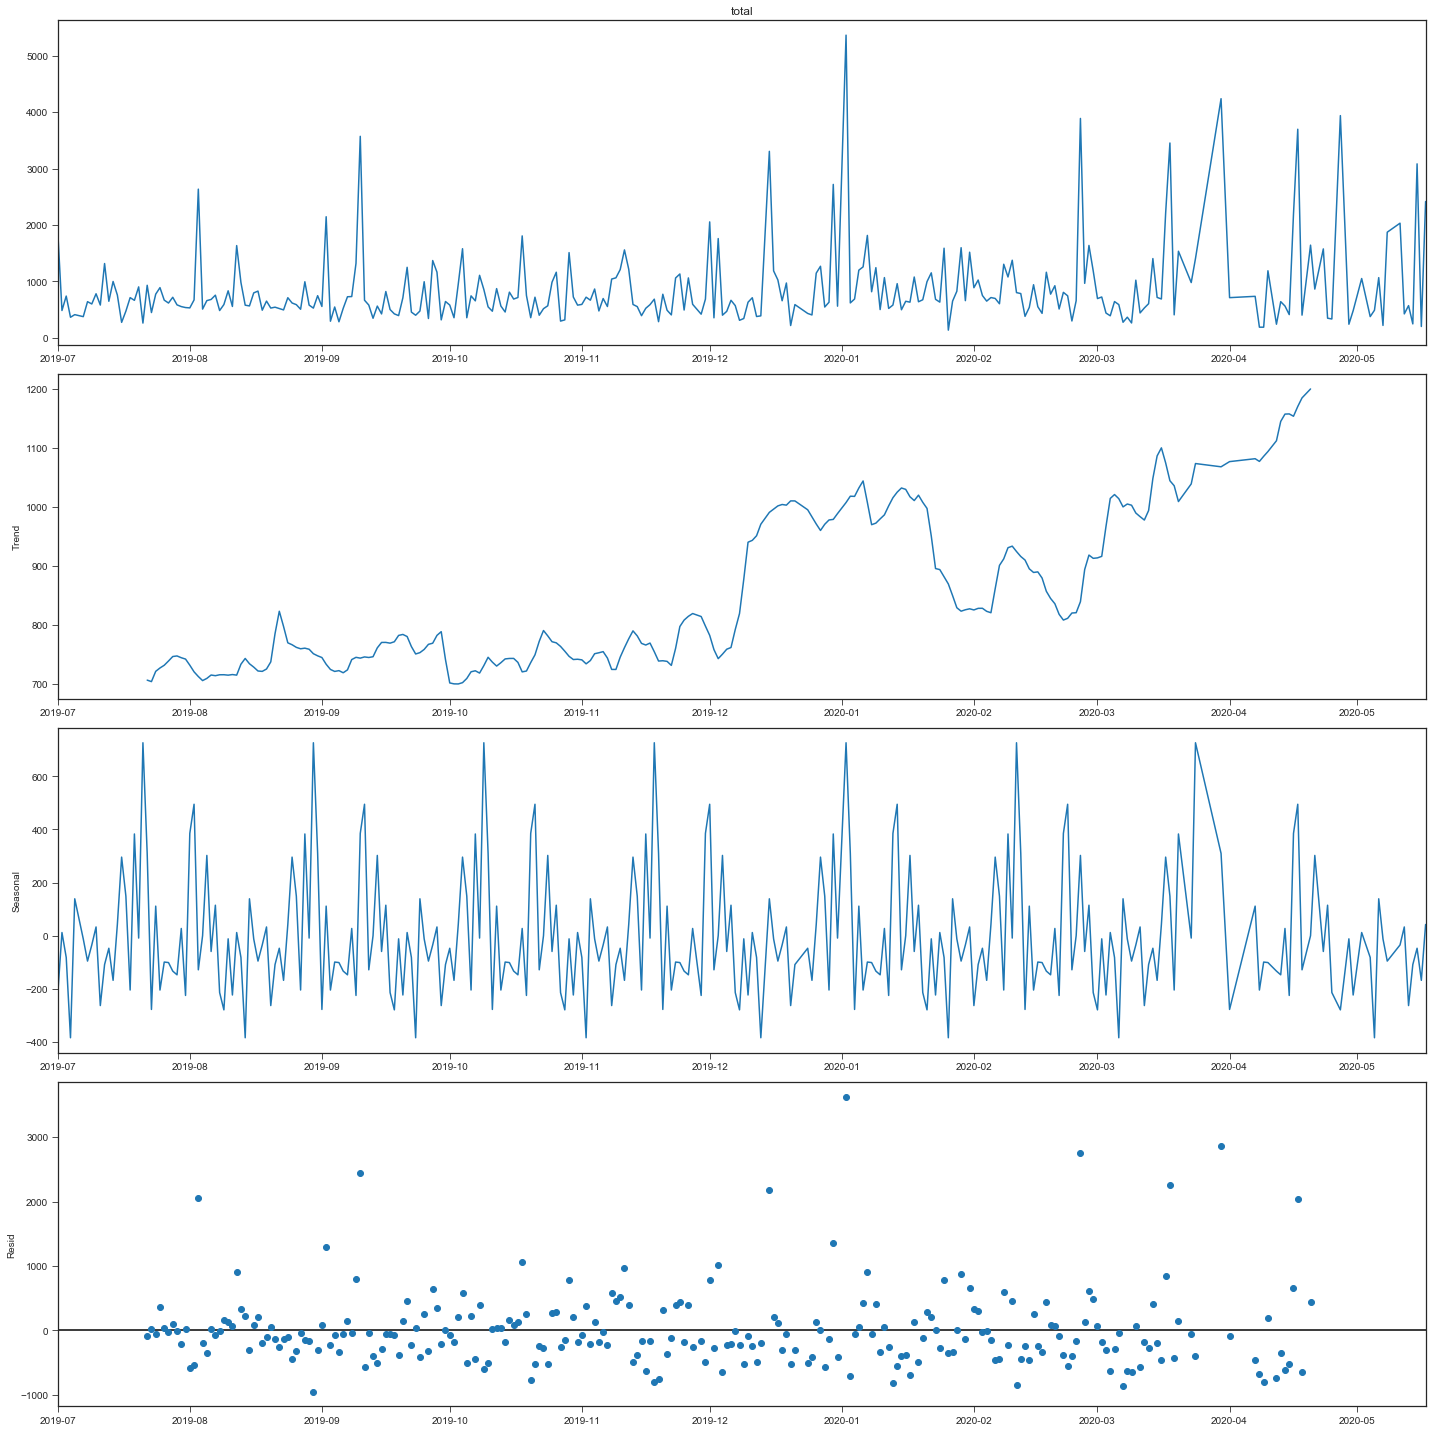

In [41]:
rcParams['figure.figsize'] = 20, 20
plot.style.use('seaborn-ticks')

# freq is the number of data points in a repeated cycle
result = seasonal_decompose(df_2['total'], model='additive',period=40)
result.plot()
plot.show()

In [42]:
#DIFERENÇA VALOR 1 SEMANA PARA TRÁS
teste_1=loja_1.copy()
teste_1['Diferença_1'] = loja_1['total'].diff(7)
teste_1.head(10)

,Data,total,Diferença_1
0,2020-01-02,1906.000000,NaN
1,2020-01-03,483.350000,NaN
2,2020-01-04,739.037500,NaN
3,2020-01-05,363.675000,NaN
4,2020-01-06,409.909091,NaN
5,2020-01-07,374.333333,NaN
6,2020-01-08,639.805000,NaN
7,2020-01-09,599.000000,-1307.0000
8,2020-01-10,780.000000,296.6500
9,2020-01-11,580.000000,-159.0375


In [43]:
#MÉDIA COMPARADA 1 SEMANA PARA TRÁS

teste_2=loja_1.copy()
teste_2['Media'] = loja_1['total'].rolling(window=7).mean().round(2)
teste_2.head(10)

,Data,total,Media
0,2020-01-02,1906.000000,NaN
1,2020-01-03,483.350000,NaN
2,2020-01-04,739.037500,NaN
3,2020-01-05,363.675000,NaN
4,2020-01-06,409.909091,NaN
5,2020-01-07,374.333333,NaN
6,2020-01-08,639.805000,702.30
7,2020-01-09,599.000000,515.59
8,2020-01-10,780.000000,557.97
9,2020-01-11,580.000000,535.25


In [44]:
#diferença percentual

teste_3=loja_1.copy()
teste_3['Variacao_%'] = loja_1['total'].pct_change(7).round(3)
teste_3.head(10)

,Data,total,Variacao_%
0,2020-01-02,1906.000000,NaN
1,2020-01-03,483.350000,NaN
2,2020-01-04,739.037500,NaN
3,2020-01-05,363.675000,NaN
4,2020-01-06,409.909091,NaN
5,2020-01-07,374.333333,NaN
6,2020-01-08,639.805000,NaN
7,2020-01-09,599.000000,-0.686
8,2020-01-10,780.000000,0.614
9,2020-01-11,580.000000,-0.215


In [45]:
#juntando todas variáveis

teste_4=loja_1.copy()
teste_4['Diferença_1'] = loja_1['total'].diff(2) #calcula a diferença
teste_4['Media'] = loja_1['total'].rolling(window=3).mean().round(2) #calcula a média

teste_4['Correlacao'] = teste_4['total'].rolling(window=3).corr(teste_4['Media']) #correção entre vendas e a média
teste_4.head(10)

,Data,total,Diferença_1,Media,Correlacao
0,2020-01-02,1906.000000,NaN,NaN,NaN
1,2020-01-03,483.350000,NaN,NaN,NaN
2,2020-01-04,739.037500,-1166.962500,1042.80,NaN
3,2020-01-05,363.675000,-119.675000,528.69,NaN
4,2020-01-06,409.909091,-329.128409,504.21,0.988251
5,2020-01-07,374.333333,10.658333,382.64,0.144029
6,2020-01-08,639.805000,229.895909,474.68,0.400750
7,2020-01-09,599.000000,224.666667,537.71,0.847671
8,2020-01-10,780.000000,140.195000,672.94,0.861310
9,2020-01-11,580.000000,-19.000000,653.00,0.543361


In [46]:
#semana e dia do ano

teste_5=loja_1.copy()

teste_5['Data'] = pd.to_datetime(teste_5['Data'])
teste_5['Dia_do_Ano'] = teste_5.Data.apply(lambda x: x.dayofyear)
teste_5['Semana_do_Ano'] = teste_5.Data.apply(lambda x: x.weekofyear)

teste_5.head(100)

,Data,total,Dia_do_Ano,Semana_do_Ano
0,2020-01-02,1906.000000,2,1
1,2020-01-03,483.350000,3,1
2,2020-01-04,739.037500,4,1
3,2020-01-05,363.675000,5,1
4,2020-01-06,409.909091,6,2
...,...,...,...,...
95,2020-04-21,355.000000,112,17
96,2020-04-23,742.554000,114,17
97,2020-04-24,654.392857,115,17
98,2020-04-25,1106.944000,116,17


In [47]:
#dia útil ou não

ddd = (pd.bdate_range(start='2019-07-01', end='2020-05-19')).values
teste_5['Dia_util'] = np.where(teste_5['Data'].isin(ddd), 1, 0)

teste_5.head()

,Data,total,Dia_do_Ano,Semana_do_Ano,Dia_util
0,2020-01-02,1906.000000,2,1,1
1,2020-01-03,483.350000,3,1,1
2,2020-01-04,739.037500,4,1,0
3,2020-01-05,363.675000,5,1,0
4,2020-01-06,409.909091,6,2,1


In [48]:
#abrindo a data

teste_5['Ano'] = teste_5['Data'].dt.year
teste_5['Mes'] = teste_5['Data'].dt.month
teste_5['Dia'] = teste_5['Data'].dt.day

teste_5.head()

,Data,total,Dia_do_Ano,Semana_do_Ano,Dia_util,Ano,Mes,Dia
0,2020-01-02,1906.000000,2,1,1,2020,1,2
1,2020-01-03,483.350000,3,1,1,2020,1,3
2,2020-01-04,739.037500,4,1,0,2020,1,4
3,2020-01-05,363.675000,5,1,0,2020,1,5
4,2020-01-06,409.909091,6,2,1,2020,1,6


In [49]:
#começo de mÊs

teste_5['Comeco_de_mes'] = np.where(teste_5['Dia'].isin([1, 2, 3, 4, 5, 6, 8, 9]), 1, 0)
teste_5.head(10)

,Data,total,Dia_do_Ano,Semana_do_Ano,Dia_util,Ano,Mes,Dia,Comeco_de_mes
0,2020-01-02,1906.000000,2,1,1,2020,1,2,1
1,2020-01-03,483.350000,3,1,1,2020,1,3,1
2,2020-01-04,739.037500,4,1,0,2020,1,4,1
3,2020-01-05,363.675000,5,1,0,2020,1,5,1
4,2020-01-06,409.909091,6,2,1,2020,1,6,1
5,2020-01-07,374.333333,7,2,1,2020,1,7,0
6,2020-01-08,639.805000,8,2,1,2020,1,8,1
7,2020-01-09,599.000000,9,2,1,2020,1,9,1
8,2020-01-10,780.000000,10,2,1,2020,1,10,0
9,2020-01-11,580.000000,11,2,0,2020,1,11,0


In [59]:
treino =  teste_5.loc[teste_5['Data'] < '2020-03-01']
teste = teste_5.loc[(teste_5['Data'] > '2020-03-02') & (teste_5['Data'] < '2020-12-19')]

x_data = teste['Data']
x_data2 = treino['Data']

del treino['Data']
del teste['Data']

In [60]:
y_treino = treino['total'].values
del treino['total']

x_treino = treino.values

y_teste = teste['total'].values
del teste['total']

x_teste = teste.values

In [61]:
regr_1 = DecisionTreeRegressor(max_depth=10, min_samples_split = 20)
regr_1.fit(x_treino, y_treino)

y_1 = regr_1.predict(x_teste)
y_pred_treino = regr_1.predict(x_treino)

from sklearn.metrics import mean_squared_error
# eval
print('The rmse of prediction is:', mean_squared_error(y_teste, y_1) **0.5)
print('The rmse of train is:', mean_squared_error(y_treino, y_pred_treino)**0.5)

The rmse of prediction is: 808.8258781157672
The rmse of train is: 582.2906659437081


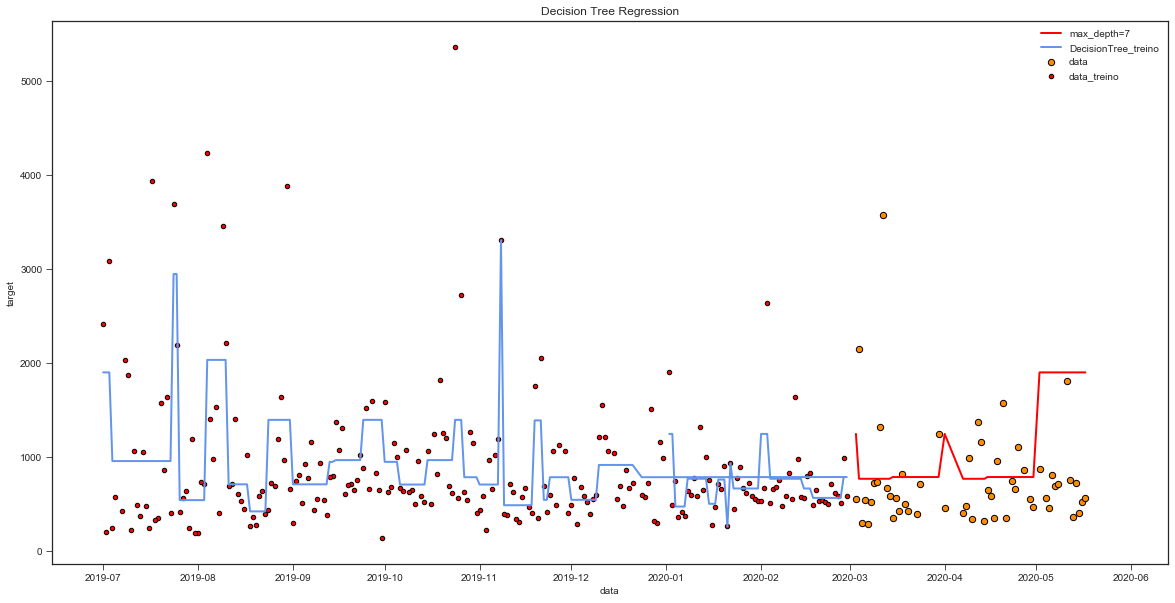

In [64]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(20, 10))
plt.scatter(x_data, y_teste, s=40, edgecolor="black", c="darkorange", label="data")
plt.scatter(x_data2, y_treino, s=20, edgecolor="black", label="data_treino", c= 'red')


plt.plot(x_data, y_1, color="red", label="max_depth=7", linewidth=2)
plt.plot(x_data2, y_pred_treino, color="cornflowerblue", label="DecisionTree_treino", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [65]:
teste_6=loja_1.copy()

teste_6['Data'] = pd.to_datetime(teste_6['Data'])
teste_6['Dia_do_Ano'] = teste_6.Data.apply(lambda x: x.dayofyear)
teste_6['Semana_do_Ano'] = teste_6.Data.apply(lambda x: x.weekofyear)
teste_6['Dia_util'] = np.where(teste_5['Data'].isin(ddd), 1, 0)
teste_6['Ano'] = teste_6['Data'].dt.year
teste_6['Mes'] = teste_6['Data'].dt.month
teste_6['Dia'] = teste_6['Data'].dt.day
teste_6['Comeco_de_mes'] = np.where(teste_5['Dia'].isin([1, 2, 3, 4, 5, 6]), 1, 0)

teste_6['Diferenca_1'] = teste_6['total'].diff(30)
teste_6['Media'] = teste_6['total'].rolling(window=31).mean().round(2)
teste_6['Correlacao'] = teste_6['total'].rolling(window=31).corr(teste_6['Media'])

lista_dif = teste_6.Diferenca_1.shift(periods = 31).tolist()
lista_med = teste_6.Media.shift(periods = 31).tolist()
lista_corr = teste_6.Correlacao.shift(periods = 31).tolist()

teste_6['Diferença_1'] = lista_dif
teste_6['Media'] = lista_med
teste_6['Correlacao'] = lista_corr

teste_6 = teste_6.dropna(axis=0, how='any')

In [70]:
treino =  teste_6.loc[teste_5['Data'] < '2020-04-17']
teste = teste_6.loc[(teste_5['Data'] > '2020-04-18') & (teste_6['Data'] < '2020-12-30')]

x_data = teste['Data']
x_data2 = treino['Data']

del treino['Data']
del teste['Data']

In [71]:
y_treino = treino['total'].values
del treino['total']

x_treino = treino.values

y_teste = teste['total'].values
del teste['total']

x_teste = teste.values

In [72]:
regr_1 = DecisionTreeRegressor(max_depth=7, min_samples_split = 10)
regr_1.fit(x_treino, y_treino)
y_1 = regr_1.predict(x_teste)
y_pred_treino = regr_1.predict(x_treino)

from sklearn.metrics import mean_squared_error
# eval
print('The rmse of prediction is:', mean_squared_error(y_teste, y_1) **0.5)
print('The rmse of train is:', mean_squared_error(y_treino, y_pred_treino)**0.5)

The rmse of prediction is: 495.78600497309986
The rmse of train is: 207.54102160430753


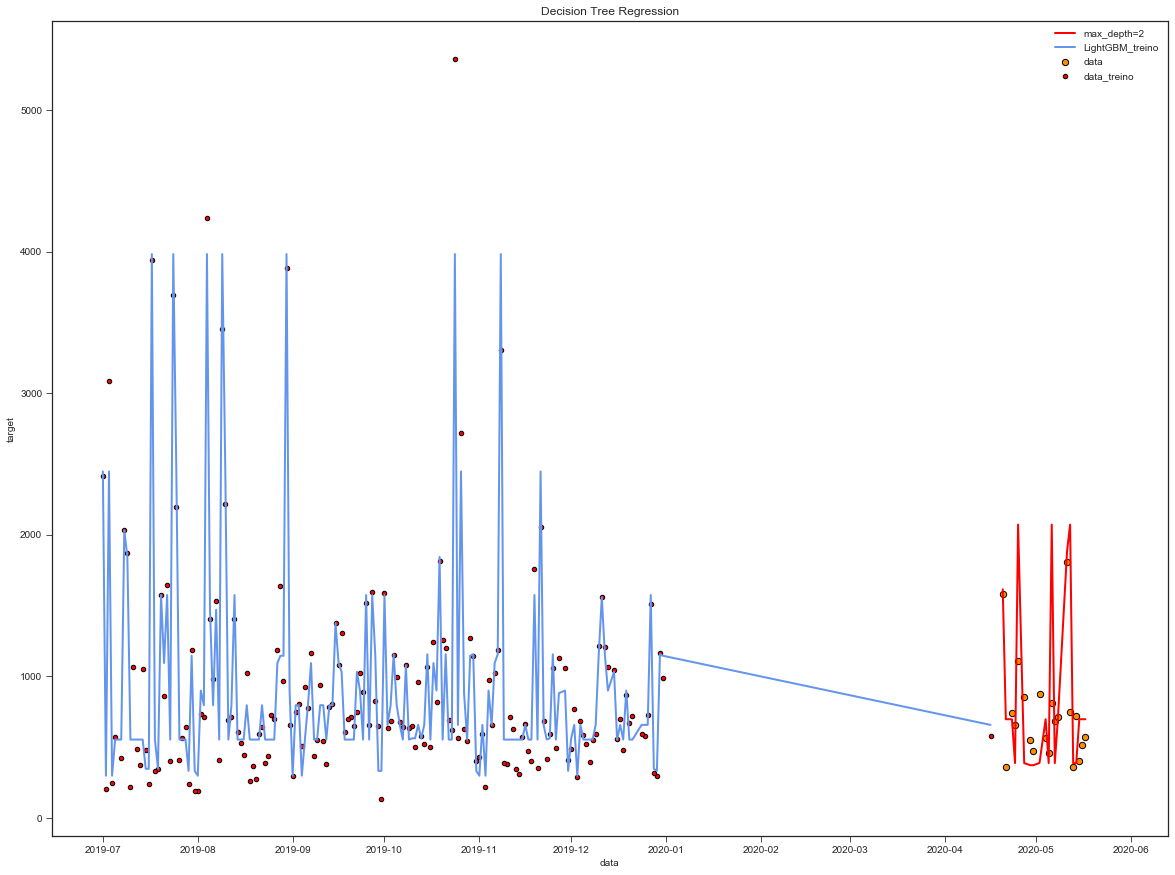

In [73]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(20, 15))
plt.scatter(x_data, y_teste, s=40, edgecolor="black", c="darkorange", label="data")
plt.scatter(x_data2, y_treino, s=20, edgecolor="black", label="data_treino", c= 'red')


plt.plot(x_data, y_1+40, color="red", label="max_depth=2", linewidth=2)
plt.plot(x_data2, y_pred_treino, color="cornflowerblue", label="LightGBM_treino", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()